In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/Users/creator/Documents/Education/CS 6241/Assignments/Project Code/CS6241


In [3]:
from fairrecs.preprocessor import preprocess_yow as pp
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
from fairrecs.utils.cof import cost_of_fairness as cof
from fairrecs.binary_dataset import GroupSettings, BinaryDataset
from scipy.stats import truncnorm
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns

# Configuration
sns.set_palette('colorblind')

In [4]:
GS1 = GroupSettings(20, 20, 20)
GS2 = GroupSettings(20, 80, 20)
BDS = BinaryDataset(GS1, GS2)

In [8]:
v = np.array([1.0 / (np.log(2 + i)) for i, _ in enumerate(BDS.u)])

In [6]:
u = BDS.u

solver = Solver(u)
P = solver.solve()

G1 = BDS.G1
G2 = BDS.G2

solver_dp = DPSolver(u, G1, G2)
P_dp = solver_dp.solve()

solver_dt = DTSolver(u, G1, G2)
P_dt = solver_dt.solve()

solver_di = DISolver(u, G1, G2)
P_di = solver_di.solve()


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.336e+02  -5.286e+04  +5e+04  7e-03  5e-09  1e+00  2e+01    ---    ---    1  1  - |  -  - 
 1  -4.577e+02  -3.954e+04  +4e+04  5e-03  1e-09  6e+00  1e+01  0.5884  5e-01   0  0  1 |  0  0
 2  -4.594e+02  -2.797e+03  +2e+03  3e-04  3e-10  3e-01  8e-01  0.9376  5e-04   0  1  2 |  0  0
 3  -5.539e+02  -9.706e+02  +4e+02  5e-05  8e-11  1e-01  1e-01  0.9890  2e-01   0  1  1 |  0  0
 4  -5.795e+02  -6.780e+02  +1e+02  1e-05  3e-11  3e-02  3e-02  0.7954  4e-02   0  1  0 |  0  0
 5  -5.877e+02  -6.120e+02  +3e+01  3e-06  4e-11  8e-03  8e-03  0.8864  2e-01   0  1  1 |  0  0
 6  -5.901e+02  -6.033e+02  +1e+01  2e-06  5e-11  4e-03  4e-03  0.7163  4e-01   1  1  0 |  0  0
 7  -5.923e+02  -5.940e+02  +2e+00  2e-07  3e-11  5e-04  5e-04  0.8902  2e-02   1  1  1 |  0  0
 8  -5.927e+02  -5.928e+02  +2e-01  2e-08  4e-

In [9]:
print("Expected utility: ", solver.expected_utility())
print("Demographic parity expected utility: ", solver_dp.expected_utility())
print("Demographic parity cost of fairness: ", cof(u, P, P_dp, v))
print("Disparate treatment expected utility: ", solver_dt.expected_utility())
print("Disparate treatment cost of fairness: ", cof(u, P, P_dt, v))
print("Disparate impact expected utility: ", solver_di.expected_utility())
print("Disparate impact cost of fairness: ", cof(u, P, P_di, v))

Expected utility:  592.6922569515524
Demographic parity expected utility:  489.04084711859133
Demographic parity cost of fairness:  64.69174603566395
Disparate treatment expected utility:  557.3868506687463
Disparate treatment cost of fairness:  29.038292174085658
Disparate impact expected utility:  543.4598895611626
Disparate impact cost of fairness:  35.04998213880896


In [11]:
solver_dpa = DPSolver(u, G1, G2)
solver_dta = DTSolver(u, G1, G2)
solver_dia = DISolver(u, G1, G2)

In [ ]:
count = 25
J = 1 - np.logspace(3,1,count)/1000
Y = np.zeros([count, 3])
C = np.zeros([count, 3])
for i, alpha in enumerate(J):
    if i % 3 == 1:
        print("Round ", i)
    solver_dpa.alpha = alpha
    solver_dta.alpha = alpha
    solver_dia.alpha = alpha
    P_dpa = solver_dpa.solve()
    P_dta = solver_dta.solve()
    P_dia = solver_dia.solve()
    Y[i, 0] = solver_dpa.expected_utility()
    Y[i, 1] = solver_dta.expected_utility()
    Y[i, 2] = solver_dia.expected_utility()
    C[i, 0] = cof(u, P, P_dpa, v)
    C[i, 1] = cof(u, P, P_dta, v)
    C[i, 2] = cof(u, P, P_dia, v)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.336e+02  -8.182e+04  +8e+04  7e-03  9e-02  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -4.382e+02  -1.682e+04  +2e+04  1e-03  2e-02  2e+00  5e+00  0.8689  8e-02   0  0  0 |  0  0
 2  -4.773e+02  -3.533e+03  +3e+03  3e-04  7e-03  4e-01  1e+00  0.8187  9e-03   0  0  1 |  0  0
 3  -5.225e+02  -1.510e+03  +1e+03  8e-05  2e-03  3e-01  3e-01  0.9784  3e-01   0  0  1 |  0  0
 4  -5.706e+02  -7.281e+02  +2e+02  1e-05  4e-04  5e-02  5e-02  0.8571  2e-02   0  0  0 |  0  0
 5  -5.835e+02  -6.370e+02  +6e+01  4e-06  1e-04  2e-02  2e-02  0.8355  2e-01   0  0  1 |  0  0
 6  -5.896e+02  -6.069e+02  +2e+01  1e-06  5e-05  5e-03  6e-03  0.7320  8e-02   0  0  0 |  0  0
 7  -5.919e+02  -5.962e+02  +4e+00  3e-07  1e-05  1e-03  1e-03  0.8398  1e-01   1  0  0 |  0  0
 8  -5.925e+02  -5.934e+02  +9e-01  7e-08  2e-

 3  -5.180e+02  -1.585e+03  +1e+03  7e-05  9e-04  3e-01  3e-01  0.9890  3e-01   0  1  0 |  0  0
 4  -5.362e+02  -1.236e+03  +7e+02  5e-05  6e-04  2e-01  2e-01  0.4281  2e-01   0  1  1 |  0  0
 5  -5.247e+02  -1.203e+03  +7e+02  5e-05  6e-04  2e-01  2e-01  0.2583  9e-01   0  1  1 |  0  0
 6  -5.583e+02  -7.544e+02  +2e+02  1e-05  2e-04  6e-02  6e-02  0.9890  3e-01   0  1  0 |  0  0
 7  -5.737e+02  -6.303e+02  +6e+01  4e-06  6e-05  2e-02  2e-02  0.8318  1e-01   0  0  0 |  0  0
 8  -5.789e+02  -6.054e+02  +3e+01  2e-06  3e-05  8e-03  9e-03  0.6495  2e-01   0  1  0 |  0  0
 9  -5.825e+02  -5.879e+02  +6e+00  4e-07  5e-06  2e-03  2e-03  0.8647  8e-02   1  1  0 |  0  0
10  -5.833e+02  -5.846e+02  +1e+00  9e-08  1e-06  4e-04  4e-04  0.8378  1e-01   1  0  0 |  0  0
11  -5.835e+02  -5.838e+02  +3e-01  2e-08  3e-07  9e-05  9e-05  0.8729  1e-01   1  0  0 |  0  0
12  -5.835e+02  -5.835e+02  +3e-02  2e-09  3e-08  8e-06  9e-06  0.9108  7e-03   1  0  0 |  0  0
13  -5.835e+02  -5.835e+02  +3e-03  2e-1

12  -5.751e+02  -5.752e+02  +2e-02  6e-09  9e-09  5e-06  6e-06  0.8872  8e-02   1  1  1 |  0  0
13  -5.751e+02  -5.752e+02  +1e-02  1e-08  6e-09  4e-06  4e-06  0.5426  4e-01   1  1  1 |  0  0
14  -5.751e+02  -5.751e+02  +9e-03  1e-08  4e-09  3e-06  3e-06  0.3706  2e-01   1  1  1 |  0  0
15  -5.751e+02  -5.751e+02  +4e-03  3e-09  2e-09  1e-06  1e-06  0.9890  5e-01   1  1  1 |  0  0
16  -5.751e+02  -5.751e+02  +4e-04  5e-09  2e-10  1e-07  1e-07  0.9211  1e-02   1  1  1 |  0  0
17  -5.751e+02  -5.751e+02  +4e-06  1e-10  2e-12  1e-09  1e-09  0.9887  1e-04   1  1  1 |  0  0

OPTIMAL (within feastol=1.3e-10, reltol=7.4e-09, abstol=4.2e-06).
Runtime: 0.018983 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.829e+02  -1.352e+05  +1e+05  7e-03  4e-02  1e+00  4e+01    ---    ---    1  1  - |  -  - 
 1  -4.071e+02  -7.510e+04  +8e+04  4e-03  1e-0


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.124e+02  -1.182e+05  +1e+05  7e-03  2e-02  1e+00  4e+01    ---    ---    1  1  - |  -  - 
 1  -4.114e+02  -4.821e+04  +5e+04  3e-03  6e-03  5e+00  2e+01  0.7110  2e-01   0  0  0 |  0  0
 2  -4.260e+02  -6.676e+03  +6e+03  4e-04  3e-03  6e-01  2e+00  0.8670  4e-04   0  1  1 |  0  0
 3  -4.640e+02  -2.479e+03  +2e+03  1e-04  8e-04  6e-01  7e-01  0.9890  3e-01   0  1  1 |  0  0
 4  -5.157e+02  -8.096e+02  +3e+02  2e-05  2e-04  9e-02  1e-01  0.8751  2e-02   0  1  1 |  0  0
 5  -5.397e+02  -6.839e+02  +1e+02  8e-06  8e-05  4e-02  5e-02  0.7424  3e-01   0  1  0 |  0  0
 6  -5.547e+02  -5.843e+02  +3e+01  2e-06  2e-05  9e-03  1e-02  0.8298  4e-02   0  1  1 |  0  0
 7  -5.582e+02  -5.695e+02  +1e+01  6e-07  6e-06  4e-03  4e-03  0.7528  2e-01   1  1  1 |  0  0
 8  -5.600e+02  -5.621e+02  +2e+00  1e-07  1e-


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.336e+02  -4.868e+04  +5e+04  7e-03  1e-02  1e+00  2e+01    ---    ---    1  1  - |  -  - 
 1  -4.147e+02  -3.839e+04  +4e+04  6e-03  3e-03  8e+00  1e+01  0.7019  6e-01   0  0  1 |  0  0
 2  -4.069e+02  -3.571e+03  +3e+03  5e-04  1e-03  7e-01  1e+00  0.9335  2e-02   0  1  2 |  0  0
 3  -4.377e+02  -1.247e+03  +8e+02  1e-04  4e-04  2e-01  3e-01  0.7826  5e-02   0  0  1 |  0  0
 4  -4.668e+02  -8.860e+02  +4e+02  6e-05  2e-04  1e-01  1e-01  0.8776  5e-01   0  0  0 |  0  0
 5  -4.925e+02  -5.619e+02  +7e+01  1e-05  4e-05  2e-02  2e-02  0.8602  3e-02   0  1  1 |  0  0
 6  -4.996e+02  -5.222e+02  +2e+01  3e-06  1e-05  7e-03  7e-03  0.8754  2e-01   0  1  0 |  0  0
 7  -5.027e+02  -5.068e+02  +4e+00  6e-07  2e-06  1e-03  1e-03  0.8674  5e-02   1  0  1 |  0  0
 8  -5.032e+02  -5.048e+02  +2e+00  2e-07  9e-


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.184e+02  -9.312e+04  +3e+05  4e-01  3e-03  1e+00  9e+01    ---    ---    1  1  - |  -  - 
 1  -5.686e+02  -3.375e+04  +2e+05  2e-01  1e-03  5e+00  5e+01  0.5422  1e-01   0  1  0 |  0  0
 2  -6.358e+02  -3.100e+04  +1e+05  2e-01  1e-03  9e+00  4e+01  0.3039  7e-01   0  0  1 |  0  0
 3  -5.383e+02  -4.185e+03  +2e+04  2e-02  2e-04  2e+00  7e+00  0.8544  2e-02   0  0  0 |  0  0
 4  -5.214e+02  -1.375e+03  +7e+03  4e-03  5e-05  4e-01  2e+00  0.7411  4e-02   0  1  1 |  0  0
 5  -5.444e+02  -7.461e+02  +2e+03  8e-04  1e-05  9e-02  5e-01  0.8105  9e-02   0  1  1 |  0  0
 6  -5.533e+02  -6.442e+02  +8e+02  4e-04  6e-06  4e-02  2e-01  0.7266  3e-01   0  1  1 |  0  0
 7  -5.573e+02  -6.024e+02  +4e+02  2e-04  3e-06  2e-02  1e-01  0.5344  6e-02   0  1  1 |  0  0
 8  -5.589e+02  -5.871e+02  +2e+02  1e-04  2e-

13  -5.603e+02  -5.604e+02  +2e-02  8e-09  8e-11  7e-07  5e-06  0.9615  5e-02   1  0  0 |  0  0
14  -5.603e+02  -5.603e+02  +2e-04  9e-11  1e-12  7e-09  6e-08  0.9890  1e-04   1  0  0 |  0  0
15  -5.603e+02  -5.603e+02  +2e-06  1e-12  1e-14  8e-11  7e-10  0.9890  1e-04   3  0  0 |  0  0

OPTIMAL (within feastol=9.6e-13, reltol=3.8e-09, abstol=2.2e-06).
Runtime: 0.016853 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -3.324e+02  -7.932e+04  +8e+04  7e-03  4e-03  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -4.347e+02  -4.397e+04  +4e+04  4e-03  7e-04  9e+00  1e+01  0.8228  4e-01   0  0  1 |  0  0
 2  -4.280e+02  -2.859e+03  +3e+03  2e-04  3e-04  5e-01  8e-01  0.9420  1e-03   0  2  1 |  0  0
 3  -4.997e+02  -8.522e+02  +4e+02  3e-05  5e-05  1e-01  1e-01  0.9796  1e-01   0  1  1 |  0  0
 4  -5.302e+02  -6.529e+02  +1e+02  1e-05  2e-0

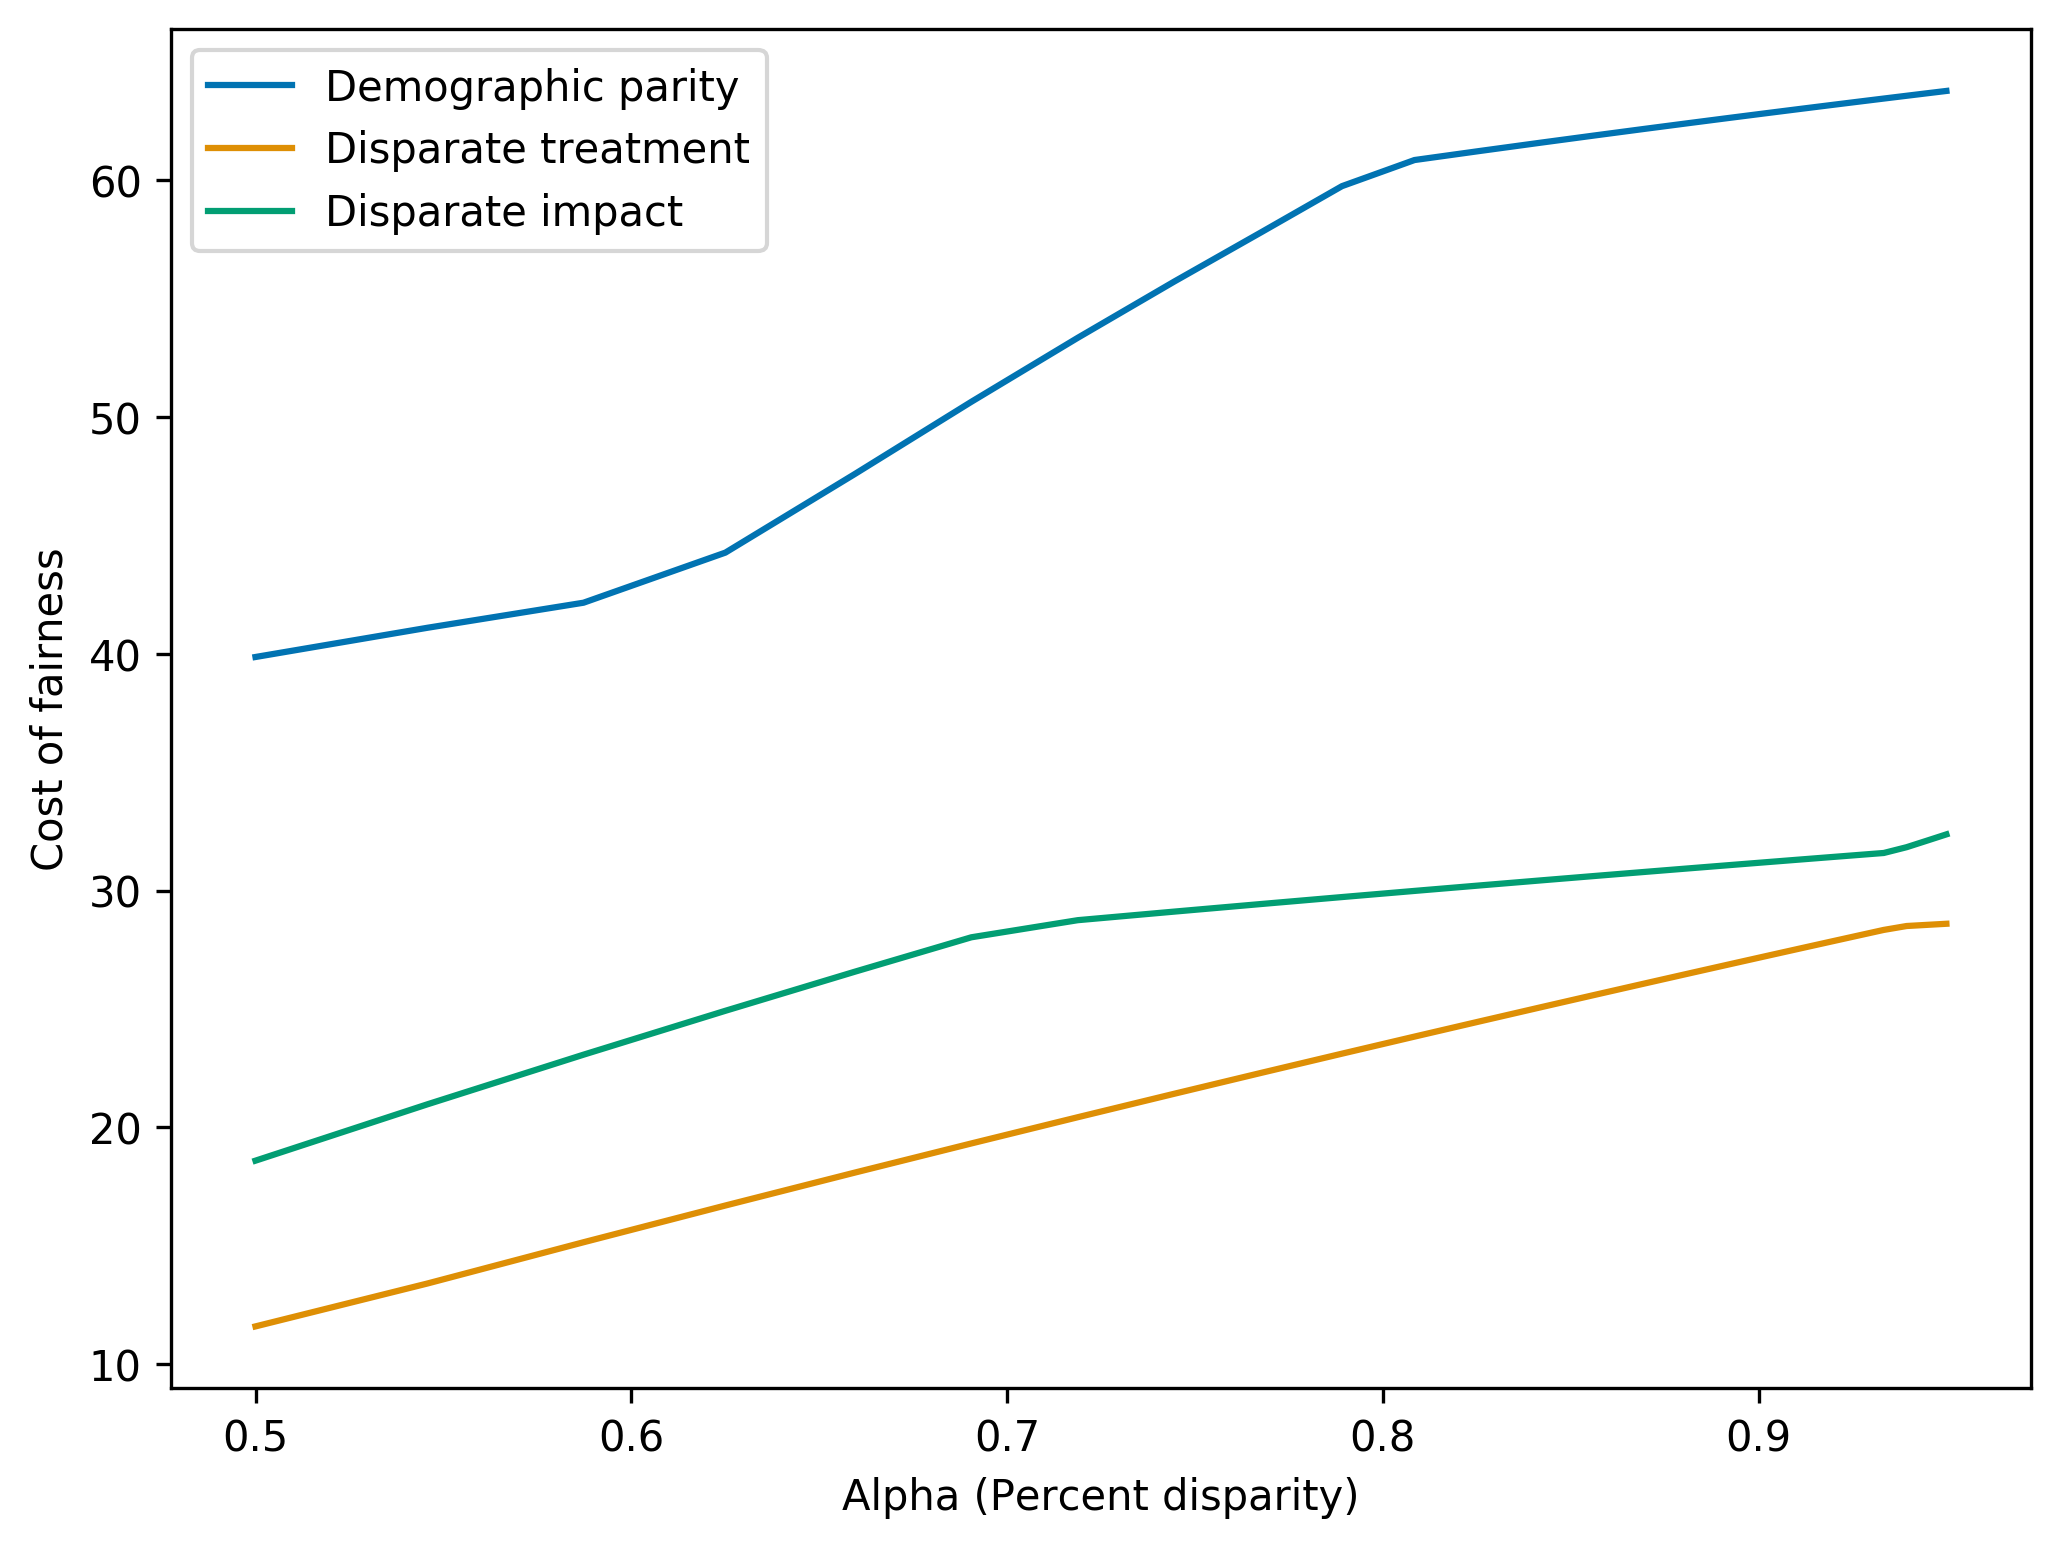

In [19]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plot(J, C[:,0], label="Demographic parity")
plot(J, C[:,1], label="Disparate treatment")
plot(J, C[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Cost of fairness')
plt.legend()
plt.show()